In [131]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
import plotly.express as px
import pickle
import tensorflow as tf
import os

sns.set()
%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.base import BaseEstimator

from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose



from sklearn.pipeline import Pipeline
from sklearn.feature_selection import VarianceThreshold
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import Normalizer, LabelEncoder, StandardScaler, MinMaxScaler, MaxAbsScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn import set_config
from sklearn.base import TransformerMixin
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import TimeSeriesSplit



from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

In [132]:
storeFirstDataframeFeatureDates = pd.read_csv('./rawData/data_prueba_Forecasting_Large_Dataframe.csv')

In [133]:
storeFirstDataframeFeatureDates.head()

,Unnamed: 0,Evento,Tienda,Producto,id_fec_diaria,Venta,Precio,Formato_Hiper,Formato_Super,Subformato_Basico,...,Day_30,Day_31,Mes_8,Mes_9,Mes_10,Year_2020,Year_2021,Mes,Day,Year
0,0,0,1,369772,2020-08-01,5.0,21.063200,0,1,1,...,0,0,1,0,0,1,0,8,1,2020
1,1,1,1,369772,2020-08-02,3.0,21.388667,0,1,1,...,0,0,1,0,0,1,0,8,2,2020
2,2,2,1,369772,2020-08-03,5.0,21.376199,0,1,1,...,0,0,1,0,0,1,0,8,3,2020
3,3,3,1,369772,2020-08-04,3.0,21.360367,0,1,1,...,0,0,1,0,0,1,0,8,4,2020
4,4,4,1,369772,2020-08-05,1.0,21.397100,0,1,1,...,0,0,1,0,0,1,0,8,5,2020


In [134]:
storeFirstDataframeFeatureDates=storeFirstDataframeFeatureDates.drop(['Unnamed: 0'], axis=1)

In [135]:
storeFirstDataframeFeatureDates['id_fec_diaria'] = pd.to_datetime(storeFirstDataframeFeatureDates['id_fec_diaria']) 

In [136]:
storeFirstDataframeFeatureDates

,Evento,Tienda,Producto,id_fec_diaria,Venta,Precio,Formato_Hiper,Formato_Super,Subformato_Basico,Subformato_Intermedio,...,Day_30,Day_31,Mes_8,Mes_9,Mes_10,Year_2020,Year_2021,Mes,Day,Year
0,0,1,369772,2020-08-01,5.0,21.063200,0,1,1,0,...,0,0,1,0,0,1,0,8,1,2020
1,1,1,369772,2020-08-02,3.0,21.388667,0,1,1,0,...,0,0,1,0,0,1,0,8,2,2020
2,2,1,369772,2020-08-03,5.0,21.376199,0,1,1,0,...,0,0,1,0,0,1,0,8,3,2020
3,3,1,369772,2020-08-04,3.0,21.360367,0,1,1,0,...,0,0,1,0,0,1,0,8,4,2020
4,4,1,369772,2020-08-05,1.0,21.397100,0,1,1,0,...,0,0,1,0,0,1,0,8,5,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
852749,87,1,2098857,2021-10-27,8.0,27.003750,0,1,0,0,...,0,0,0,0,1,0,1,10,27,2021
852750,88,1,2098857,2021-10-28,18.0,26.911667,0,1,0,0,...,0,0,0,0,1,0,1,10,28,2021
852751,89,1,2098857,2021-10-29,13.0,24.463077,0,1,0,0,...,0,0,0,0,1,0,1,10,29,2021
852752,90,1,2098857,2021-10-30,17.0,25.404118,0,1,0,0,...,1,0,0,0,1,0,1,10,30,2021


C:\Users\alan_\AppData\Local\Temp\ipykernel_38868\2909650744.py:9: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = correlation_matrix[columns_for_correlation].corr()


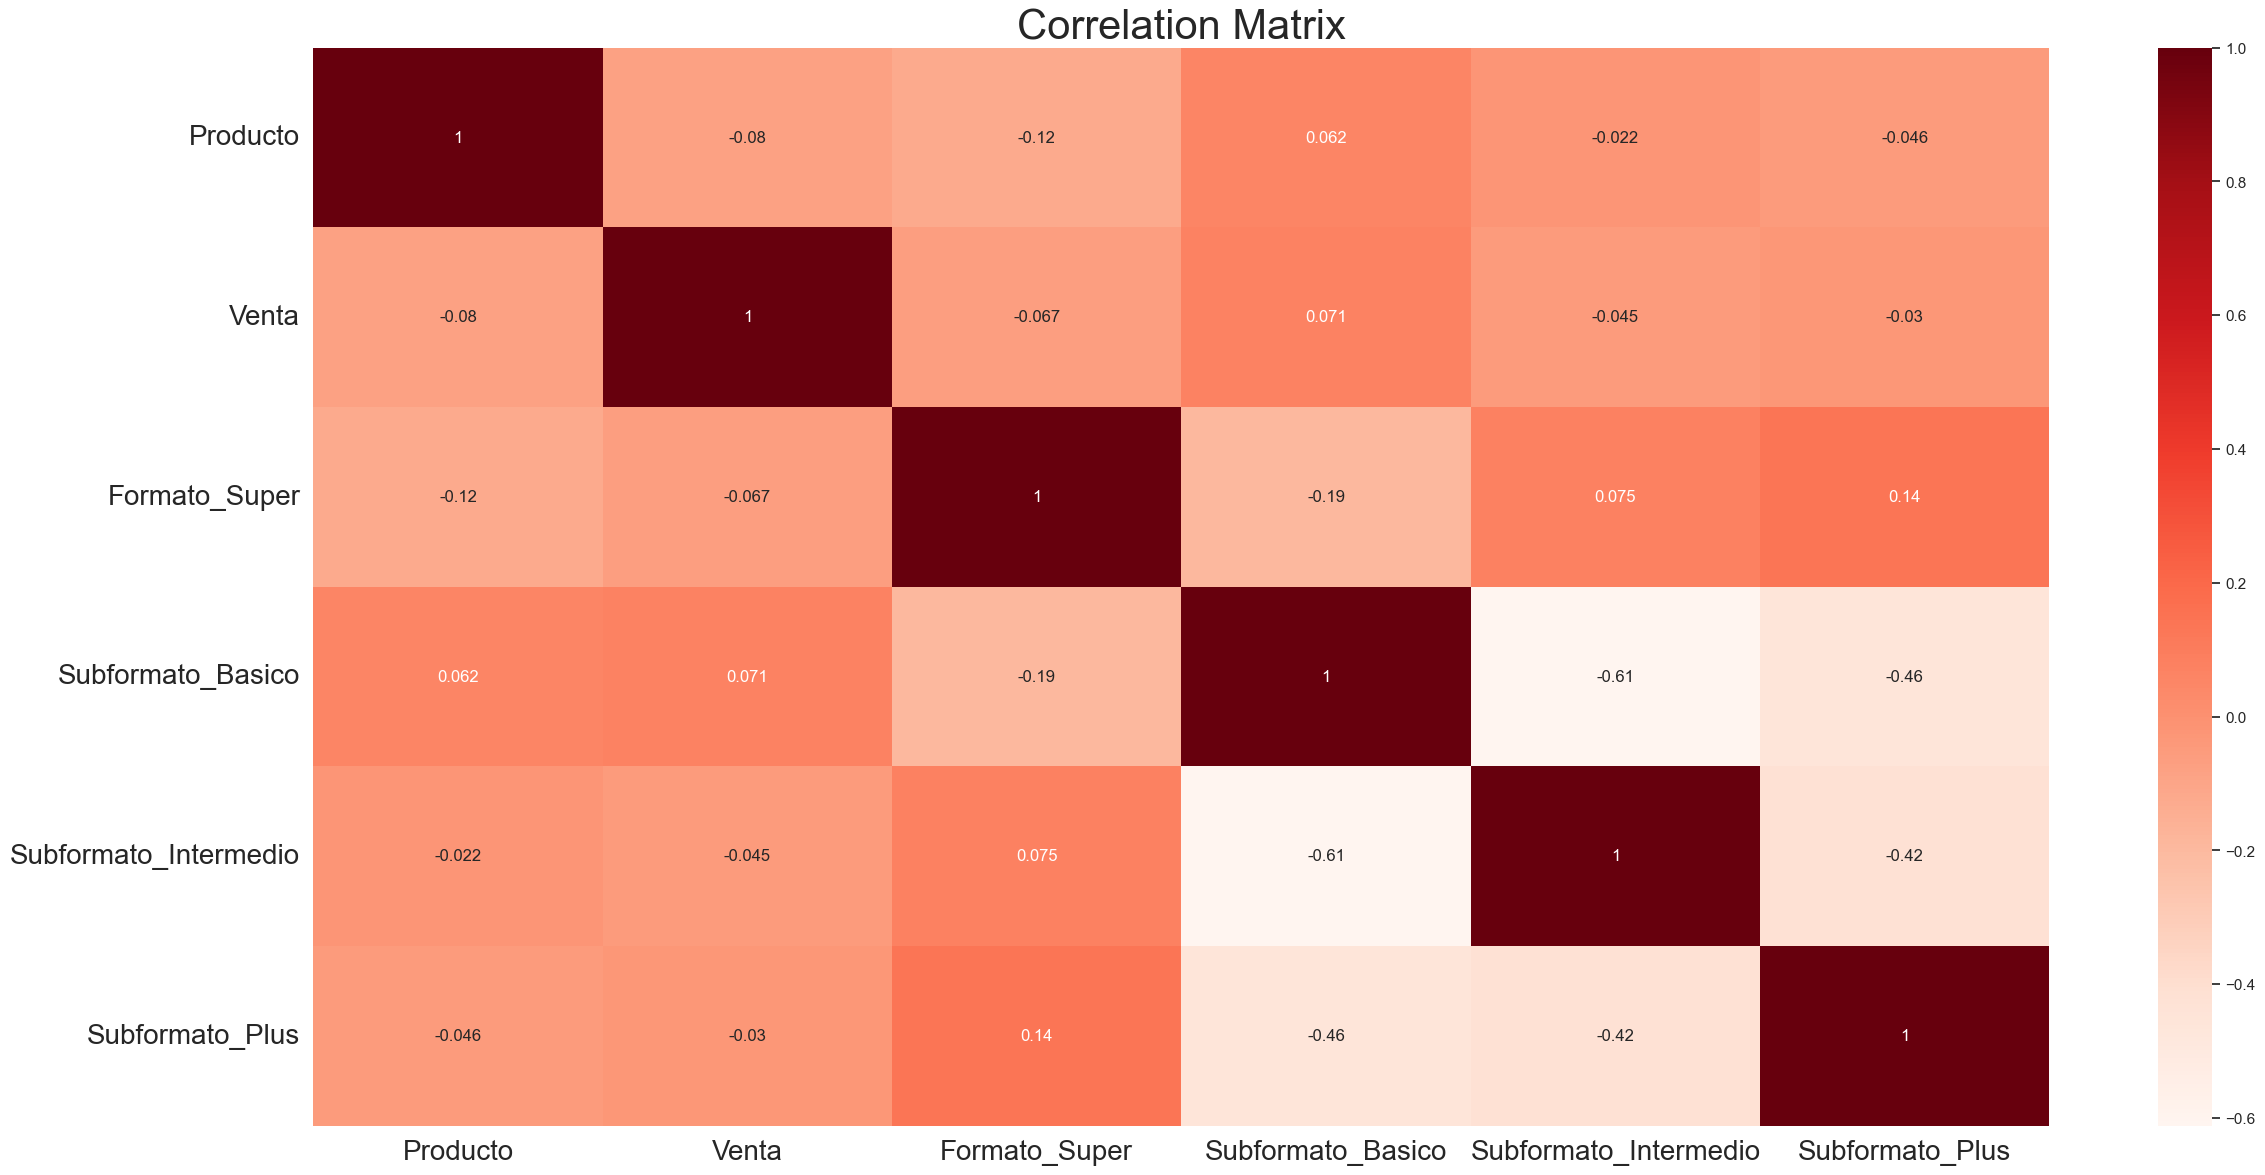

In [137]:
plt.figure(figsize=(28,14))
plt.xticks( fontsize=20)
plt.yticks( fontsize=20)

columns_for_correlation = ['Producto', 'id_fec_diaria', 'Venta', 'Formato_Super', 'Subformato_Basico', 'Subformato_Intermedio', 'Subformato_Plus']

correlation_matrix = storeFirstDataframeFeatureDates.copy()

correlation_matrix = correlation_matrix[columns_for_correlation].corr()

sns.heatmap(correlation_matrix, cmap='Reds', annot=True, annot_kws={'size': 12})
plt.title('Correlation Matrix', fontsize=30)
plt.show()


C:\Users\alan_\AppData\Local\Temp\ipykernel_38868\71146836.py:7: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = correlation_matrix.drop(correlation_matrix.filter(regex=("Day.+")).columns,axis=1).corr()


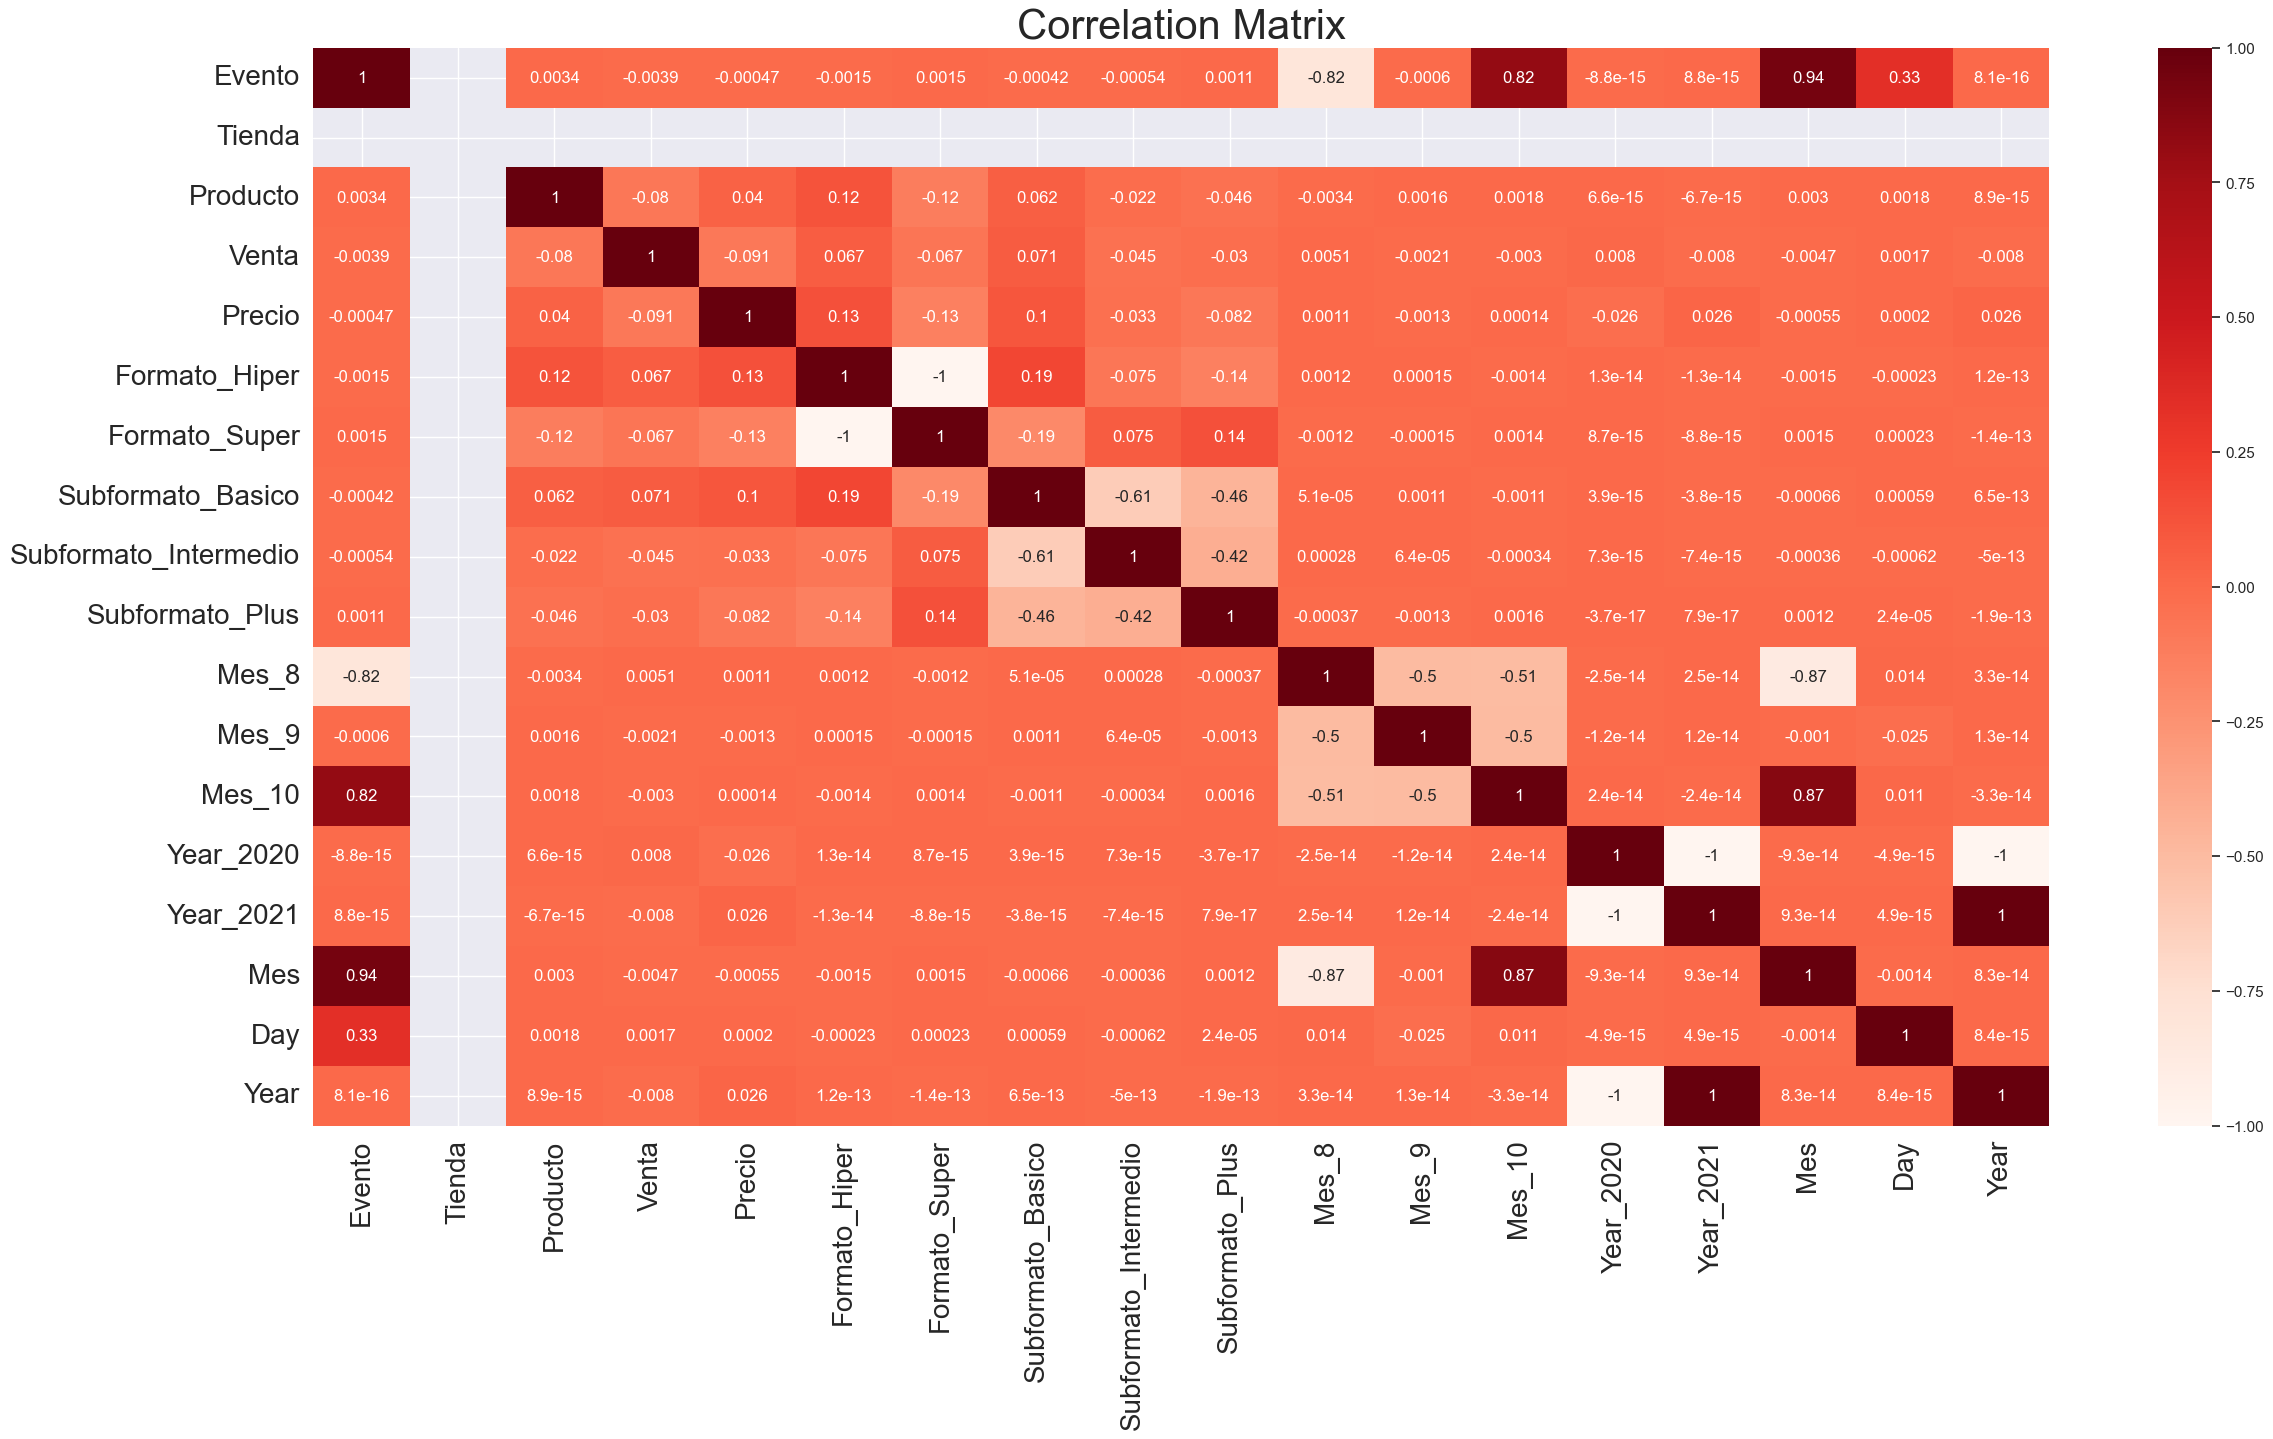

In [138]:
plt.figure(figsize=(28,14))
plt.xticks( fontsize=20)
plt.yticks( fontsize=20)

correlation_matrix = storeFirstDataframeFeatureDates.copy()

correlation_matrix = correlation_matrix.drop(correlation_matrix.filter(regex=("Day.+")).columns,axis=1).corr()

sns.heatmap(correlation_matrix, cmap='Reds', annot=True, annot_kws={'size': 12})
plt.title('Correlation Matrix', fontsize=30)
plt.show()

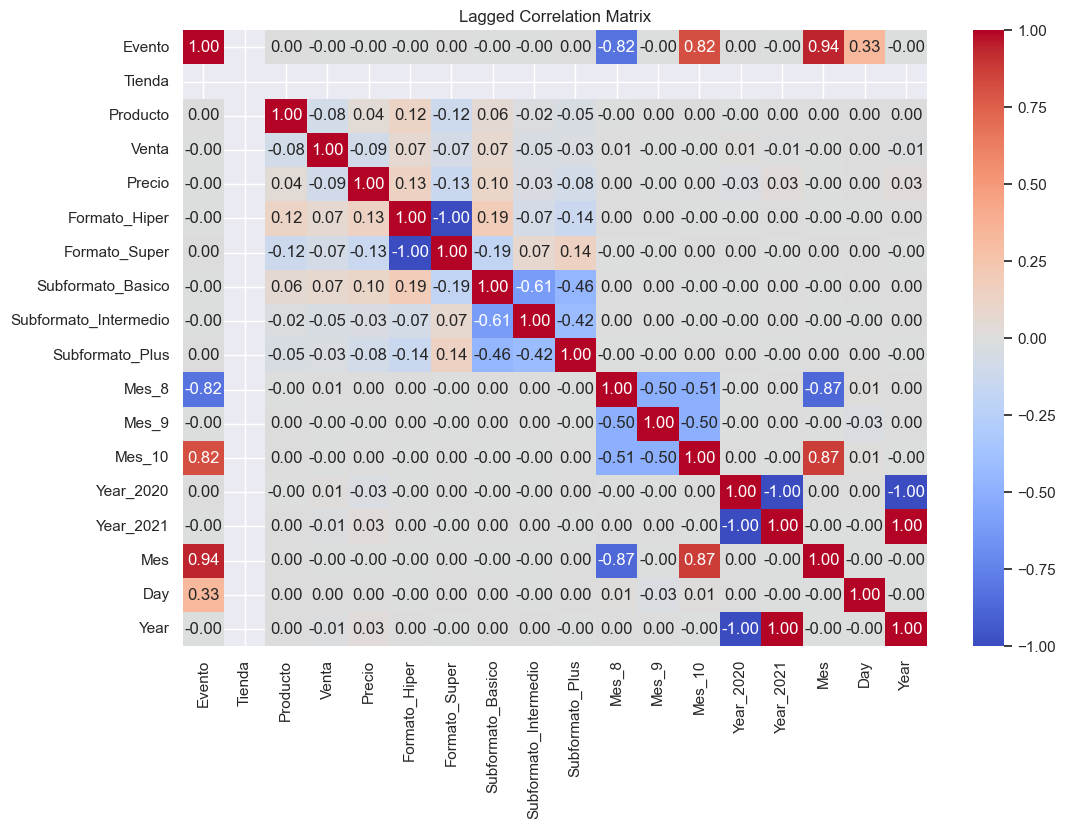

In [139]:
laggedCorrMatrix = storeFirstDataframeFeatureDates.copy()
laggedCorrMatrix = laggedCorrMatrix.drop(laggedCorrMatrix.filter(regex=("Day.+")).columns,axis=1)
laggedCorrMatrix.set_index('id_fec_diaria', inplace=True)
lagged_data = laggedCorrMatrix.shift(1)  
correlation_matrix = lagged_data.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, cmap='coolwarm', center=0, annot=True, fmt=".2f")
plt.title('Lagged Correlation Matrix')
plt.show()

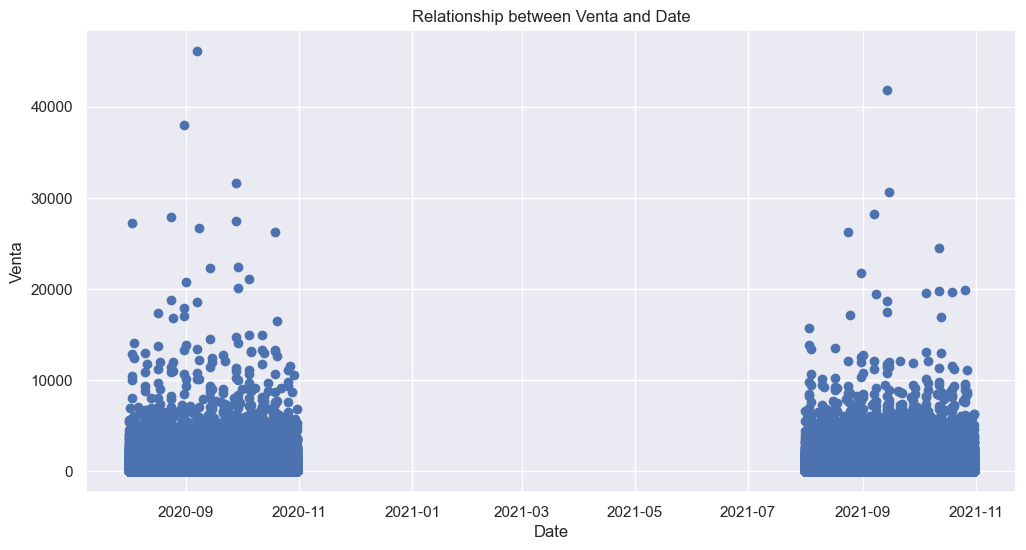

In [140]:
storeFirstDataframeFeatureDateToPlot = storeFirstDataframeFeatureDates.copy()

storeFirstDataframeFeatureDateToPlot.set_index('id_fec_diaria', inplace=True)

plt.figure(figsize=(12, 6))
plt.scatter(storeFirstDataframeFeatureDateToPlot.index, storeFirstDataframeFeatureDateToPlot['Venta'])
plt.xlabel('Date')
plt.ylabel('Venta')
plt.title('Relationship between Venta and Date')
plt.show()

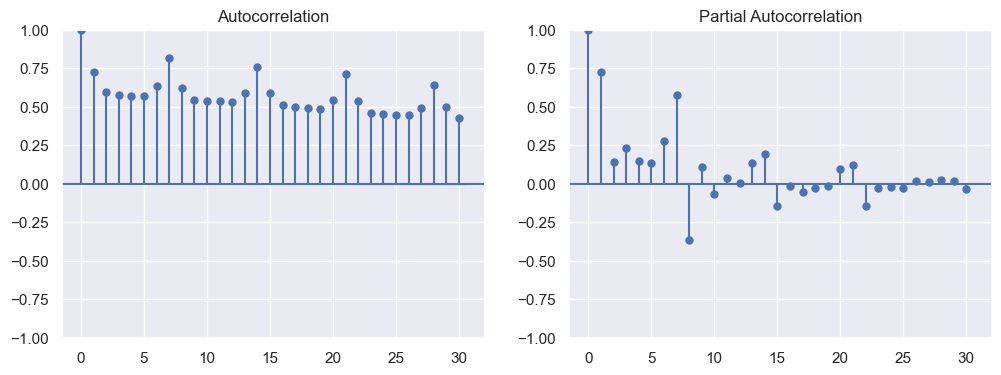

In [141]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
plot_acf(storeFirstDataframeFeatureDateToPlot['Venta'], ax=ax[0], lags=30)
plot_pacf(storeFirstDataframeFeatureDateToPlot['Venta'], ax=ax[1], lags=30)
plt.show()

In [142]:
scaler = StandardScaler()

Se planea utilizar dos modelos. Primero, algo simple como lo es ARIMA. Después, un modelo más complejo como lo es un modelo LSTM. El primero nos permite trabajar con menor cantidad de información. Para el segundo se requiere una mayor cantidad de información pero puede retener información del pasado para hacer las predicciones.

Para la primera parte, debo hacer un split del dataset, usando para el training desde agosto 1 del año anterior hasta finales de septiembre del 2020, y los mismos meses pero del año 2021. Para testear el modelo, se usará del 1 al 31 de octubre del 2020 y del 1 al 14 de octubre del 2021. Luego, del 15 al 31 se tomará para el pronóstico. Esto para el punto b.  

Para la segunda parte, se ejecutará el modelo con la información de noviembre, una vez perfeccionado el entrenamiento del mismo con la información de los dataset anteriormente segmentados

In [143]:
storeFirstDataframeFeatureDates

,Evento,Tienda,Producto,id_fec_diaria,Venta,Precio,Formato_Hiper,Formato_Super,Subformato_Basico,Subformato_Intermedio,...,Day_30,Day_31,Mes_8,Mes_9,Mes_10,Year_2020,Year_2021,Mes,Day,Year
0,0,1,369772,2020-08-01,5.0,21.063200,0,1,1,0,...,0,0,1,0,0,1,0,8,1,2020
1,1,1,369772,2020-08-02,3.0,21.388667,0,1,1,0,...,0,0,1,0,0,1,0,8,2,2020
2,2,1,369772,2020-08-03,5.0,21.376199,0,1,1,0,...,0,0,1,0,0,1,0,8,3,2020
3,3,1,369772,2020-08-04,3.0,21.360367,0,1,1,0,...,0,0,1,0,0,1,0,8,4,2020
4,4,1,369772,2020-08-05,1.0,21.397100,0,1,1,0,...,0,0,1,0,0,1,0,8,5,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
852749,87,1,2098857,2021-10-27,8.0,27.003750,0,1,0,0,...,0,0,0,0,1,0,1,10,27,2021
852750,88,1,2098857,2021-10-28,18.0,26.911667,0,1,0,0,...,0,0,0,0,1,0,1,10,28,2021
852751,89,1,2098857,2021-10-29,13.0,24.463077,0,1,0,0,...,0,0,0,0,1,0,1,10,29,2021
852752,90,1,2098857,2021-10-30,17.0,25.404118,0,1,0,0,...,1,0,0,0,1,0,1,10,30,2021


In [144]:
training_start = '2020-08-01'
training_end = '2020-09-30'
validation_start = '2020-10-01'
validation_end = '2020-10-14'
testing_start = '2021-10-15'
testing_end = '2021-10-31'

training_data = storeFirstDataframeFeatureDates[(storeFirstDataframeFeatureDates['id_fec_diaria'] >= training_start) & (storeFirstDataframeFeatureDates['id_fec_diaria'] <= training_end) |
                     ((storeFirstDataframeFeatureDates['id_fec_diaria'] >= '2021-08-01') & (storeFirstDataframeFeatureDates['id_fec_diaria'] <= '2021-09-30'))]

validation_data = storeFirstDataframeFeatureDates[(storeFirstDataframeFeatureDates['id_fec_diaria'] >= validation_start) & (storeFirstDataframeFeatureDates['id_fec_diaria'] <= validation_end)]
testing_data = storeFirstDataframeFeatureDates[(storeFirstDataframeFeatureDates['id_fec_diaria'] >= testing_start) & (storeFirstDataframeFeatureDates['id_fec_diaria'] <= testing_end)]

In [145]:
training_data.head()

,Evento,Tienda,Producto,id_fec_diaria,Venta,Precio,Formato_Hiper,Formato_Super,Subformato_Basico,Subformato_Intermedio,...,Day_30,Day_31,Mes_8,Mes_9,Mes_10,Year_2020,Year_2021,Mes,Day,Year
0,0,1,369772,2020-08-01,5.0,21.063200,0,1,1,0,...,0,0,1,0,0,1,0,8,1,2020
1,1,1,369772,2020-08-02,3.0,21.388667,0,1,1,0,...,0,0,1,0,0,1,0,8,2,2020
2,2,1,369772,2020-08-03,5.0,21.376199,0,1,1,0,...,0,0,1,0,0,1,0,8,3,2020
3,3,1,369772,2020-08-04,3.0,21.360367,0,1,1,0,...,0,0,1,0,0,1,0,8,4,2020
4,4,1,369772,2020-08-05,1.0,21.397100,0,1,1,0,...,0,0,1,0,0,1,0,8,5,2020
